In [14]:
import matplotlib.pyplot as plt
import numpy as np

from keras.layers import Dense, SimpleRNN, LSTM, Input
from keras.models import Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
i = Input(shape = x_train[0].shape)
x = SimpleRNN(128) (i)
x = Dense(10, activation = 'softmax') (x)
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
	loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [9]:
r = model.fit(
	x_train,
    y_train,
    validation_data=(
    	x_test,
        y_test
    ),
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3519 - accuracy: 0.4901 - val_loss: 1.3040 - val_accuracy: 0.4964
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2673 - accuracy: 0.5136 - val_loss: 1.2691 - val_accuracy: 0.5070
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2345 - accuracy: 0.5238 - val_loss: 1.2507 - val_accuracy: 0.5211
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2149 - accuracy: 0.5280 - val_loss: 1.2247 - val_accuracy: 0.5278
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2074 - accuracy: 0.5307 - val_loss: 1.2211 - val_accuracy: 0.5229
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1932 - accuracy: 0.5345 - val_loss: 1.2150 - val_accuracy: 0.5289
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1882 - accuracy: 0.5349 - val_loss: 1.2234 - val_accuracy

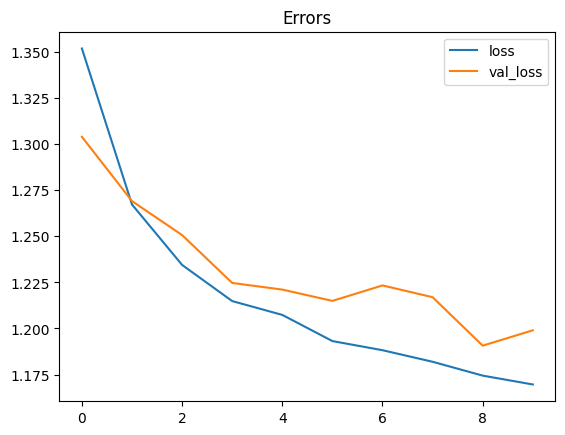

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Errors')
plt.legend()

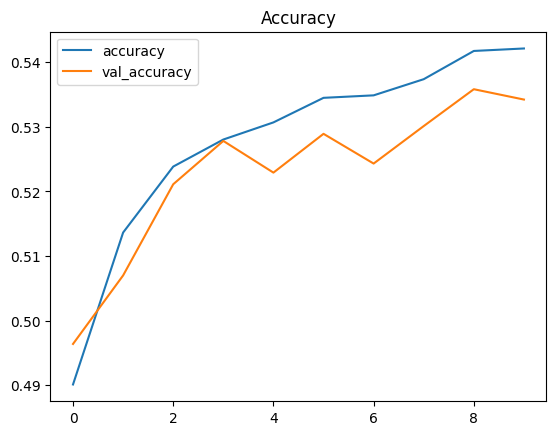

In [12]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.legend()

313/313 [==============================] - 1s 2ms/step


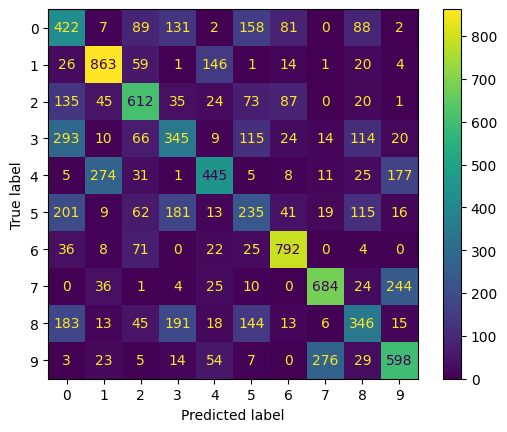

In [20]:
y_pred = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
disp.plot()

### Using LSTM

In [21]:
i = Input(shape = x_train[0].shape)
x = LSTM(128) (i)
x = Dense(10, activation = 'softmax') (x)
model2 = Model(i, x)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(
	loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

r = model2.fit(
	x_train,
    y_train,
    validation_data=(
    	x_test,
        y_test
    ),
    epochs = 10
)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5298 - accuracy: 0.8202 - val_loss: 0.3579 - val_accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3157 - accuracy: 0.8936 - val_loss: 0.2916 - val_accuracy: 0.9033
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2598 - accuracy: 0.9124 - val_loss: 0.2574 - val_accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2304 - accuracy: 0.9229 - val_loss: 0.2366 - val_accuracy: 0.9209
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2061 - accuracy: 0.9313 - val_loss: 0.2266 - val_accuracy: 0.9218
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1949 - accuracy: 0.9352 - val_loss: 0.2064 - val_accuracy: 0.9325
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1817 - accuracy: 0.9380 - val_loss: 0.2030 -

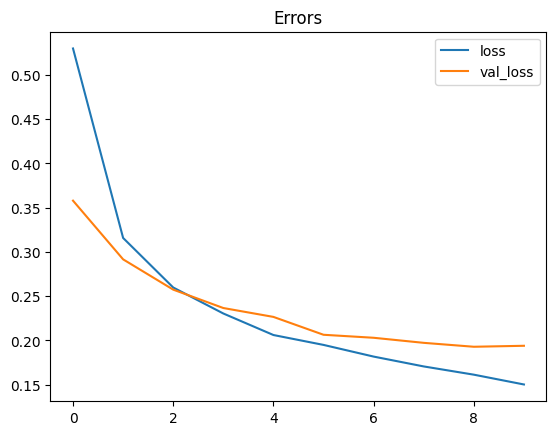

In [23]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.title('Errors')
plt.legend()

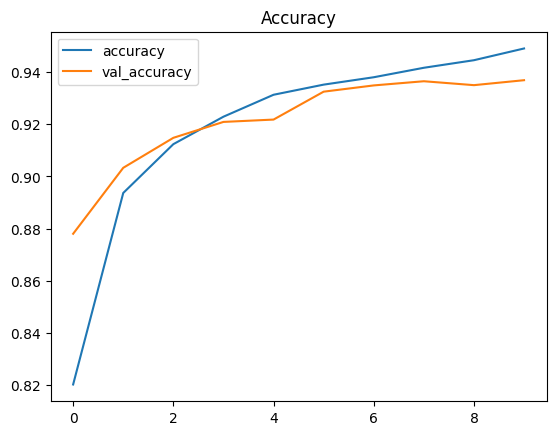

In [24]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.legend()

313/313 [==============================] - 2s 6ms/step


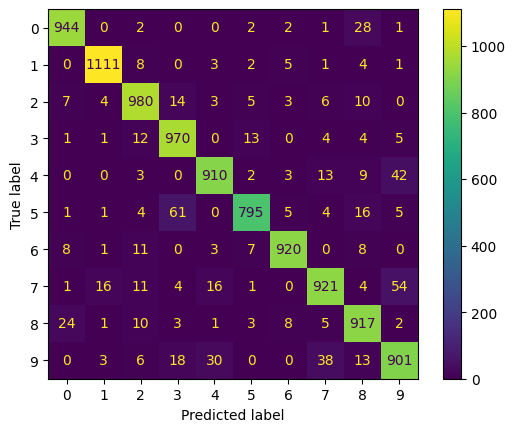

In [25]:
y_pred = model2.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
disp.plot()

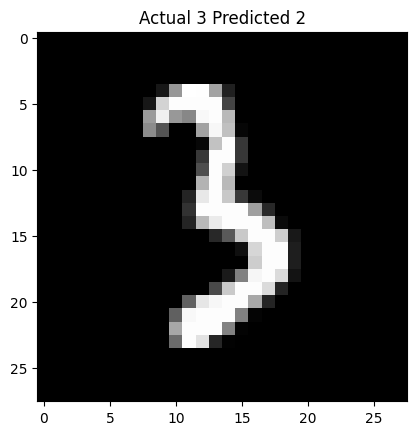

In [46]:
misclassified = np.where(y_test != y_pred)[0]
idx = misclassified[3]
plt.title(f'Actual {y_test[idx]} Predicted {y_pred[idx]}')
plt.imshow(x_test[idx], cmap='gray')

In [40]:
y_pred[8]

8